dataset : https://www.kaggle.com/datasets/vstepanenko/disaster-tweets 


```

Using BERT + Tensflow+neural network to classify the disaster tweets 

In [ ]:
import pandas as pd
df = pd.read_csv("disaster.csv",encoding='ISO-8859-1')
df.head(5)

,ï»¿id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df = df.drop(['ï»¿id','keyword','location'],axis=1)
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df.shape

(11370, 2)

In [ ]:
df['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

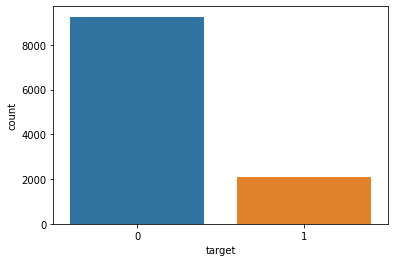

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
df_0_class = df[df['target']==0]
df_1_class = df[df['target']==1]
df_0_class_undersampled = df_0_class.sample(df_1_class.shape[0])
df = pd.concat([df_0_class_undersampled, df_1_class], axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['target'],test_size=0.2 )

In [ ]:
!pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 462 kB 52.3 MB/s 


Apply TensorFlow and build a classification model using BERT

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']


#Build model
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)



In [ ]:
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
106/106 [==============================] - 98s 793ms/step - loss: 0.6489 - accuracy: 0.6132
Epoch 2/10
106/106 [==============================] - 84s 790ms/step - loss: 0.6027 - accuracy: 0.6747
Epoch 3/10
106/106 [==============================] - 84s 791ms/step - loss: 0.5855 - accuracy: 0.7022
Epoch 4/10
106/106 [==============================] - 84s 790ms/step - loss: 0.5647 - accuracy: 0.7218
Epoch 5/10
106/106 [==============================] - 84s 790ms/step - loss: 0.5491 - accuracy: 0.7389
Epoch 6/10
106/106 [==============================] - 84s 795ms/step - loss: 0.5398 - accuracy: 0.7457
Epoch 7/10
106/106 [==============================] - 84s 789ms/step - loss: 0.5431 - accuracy: 0.7419
Epoch 8/10
106/106 [==============================] - 85s 803ms/step - loss: 0.5300 - accuracy: 0.7510
Epoch 9/10
106/106 [==============================] - 84s 788ms/step - loss: 0.5286 - accuracy: 0.7534
Epoch 10/10
106/106 [==============================] - 84s 789ms/step - l

**Model performance**

https://www.analyticsvidhya.com/blog/2021/12/disaster-tweet-classification-using-bert-neural-network/
https://stackoverflow.com/questions/67452037/how-to-preprocess-a-dataset-for-bert-model-implemented-in-tensorflow-2-x

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
import numpy as np
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[308, 123],
       [ 67, 348]])